In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, asin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head()
df.shape
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
# Data Preprocessing
# Convert pickup_datetime column to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [6]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
# Fill missing values with mean/median
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)


C:\Users\rutua\AppData\Local\Temp\ipykernel_3000\3122794453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
C:\Users\rutua\AppData\Local\Temp\ipykernel_3000\3122794453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
# Extract date & time features
df = df.assign(
    hour = df.pickup_datetime.dt.hour,
    day = df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [10]:
# Distance calculation using Haversine Formula
# ----------------------------------------------
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    for pos in range(len(longitude1)):
        long1, lati1, long2, lati2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a)) * 6371  # Earth radius in km
        travel_dist.append(c)
    return travel_dist

In [11]:
df['dist_travel_km'] = distance_transform(
    df['pickup_longitude'].to_numpy(),
    df['pickup_latitude'].to_numpy(),
    df['dropoff_longitude'].to_numpy(),
    df['dropoff_latitude'].to_numpy()
)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [12]:
# Drop datetime column (already extracted)
df = df.drop('pickup_datetime', axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

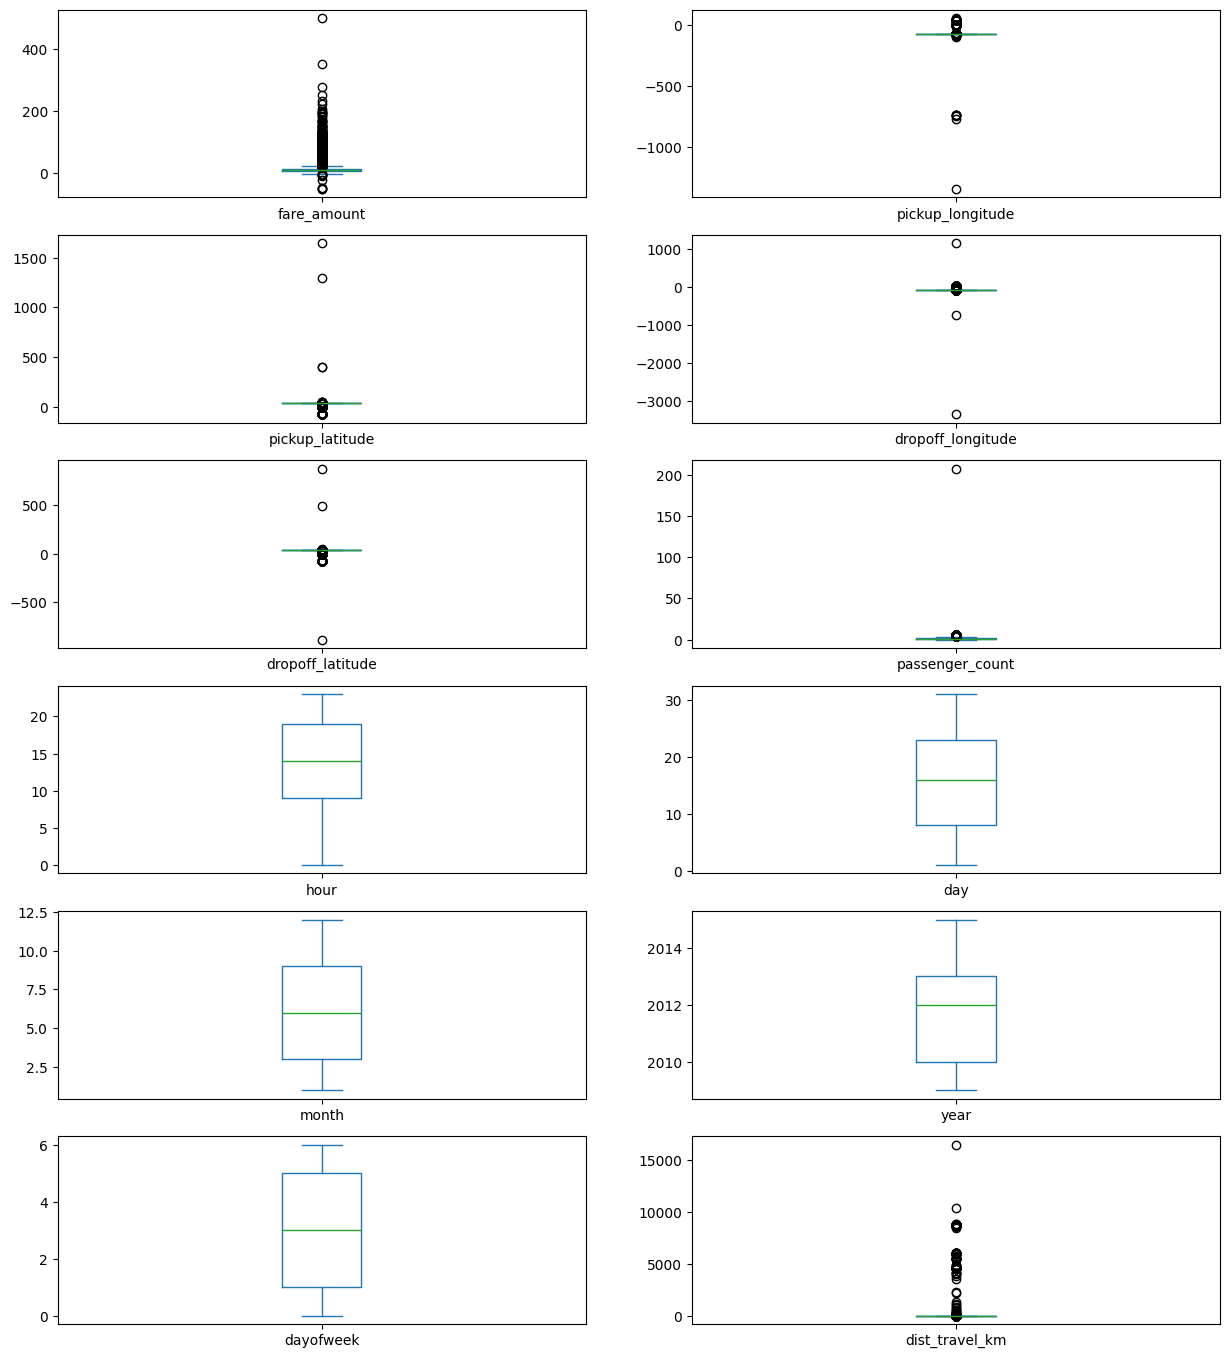

In [13]:
# Outlier Detection and Treatment
# ----------------------------------------------
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

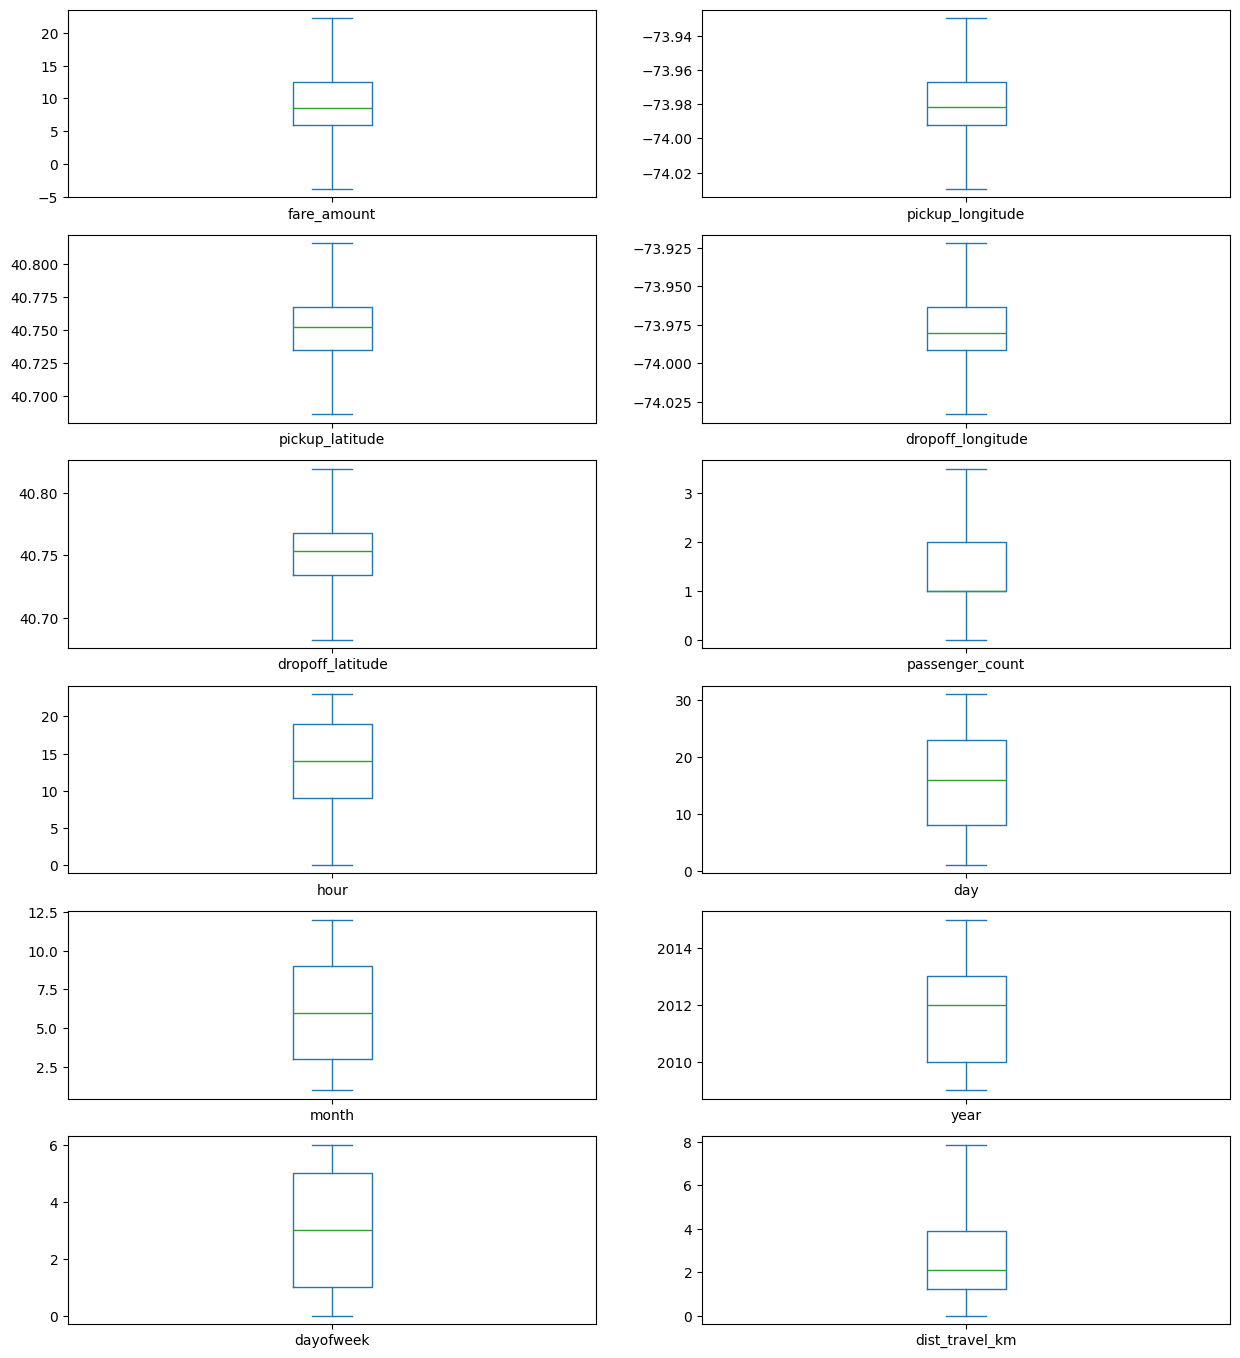

In [14]:
# Using IQR method to remove outliers
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

df = treat_outliers_all(df, df.columns)
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))


In [15]:
# Limit maximum travel distance (Uber doesn’t go beyond 130 km)
df = df.loc[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]
print("Remaining observations in the dataset:", df.shape)

Remaining observations in the dataset: (164097, 12)


<Axes: >

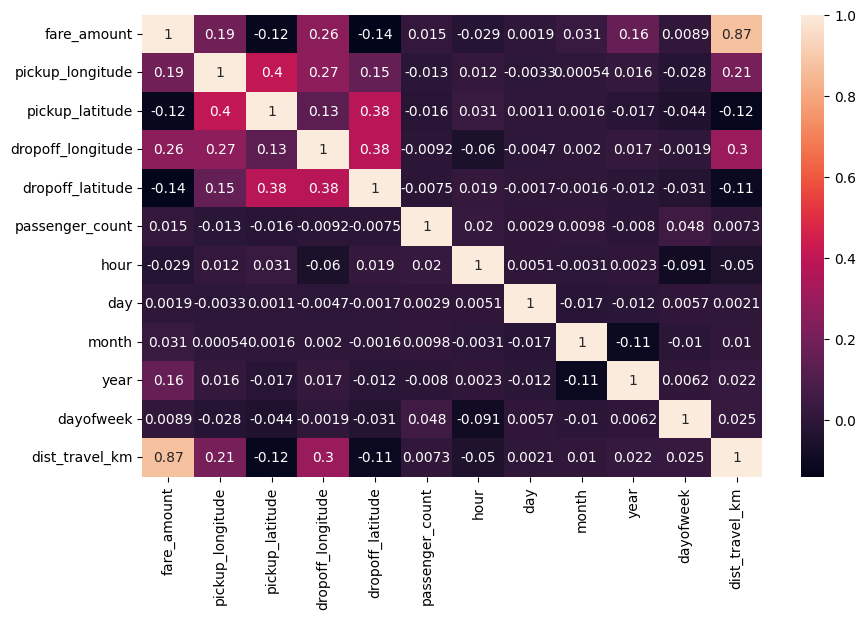

In [28]:
# Remove incorrect latitude and longitude values
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
    (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)
]
df.drop(incorrect_coordinates.index, inplace=True, errors='ignore')

df.isnull().sum()
fig,axis = plt.subplots(figsize = (10,6)) 
sns.heatmap(df.corr(),annot=True)  

In [17]:
# Model Building
# ----------------------------------------------
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
        'passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [18]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [30]:
# Linear Regression
# ----------------------------------------------
regression = LinearRegression()
regression.fit(X_train, y_train)
prediction = regression.predict(X_test)
print(prediction)

[ 7.03940344 13.39047653  9.47488136 ... 10.15992055  7.08602704
 20.7498553 ]


In [20]:
# Evaluation
R2_LR = r2_score(y_test, prediction)
MSE_LR = mean_squared_error(y_test, prediction)
RMSE_LR = np.sqrt(MSE_LR)

In [21]:
print("Linear Regression Results:")
print("R2 Score:", R2_LR)
print("MSE:", MSE_LR)
print("RMSE:", RMSE_LR)

Linear Regression Results:
R2 Score: 0.7960793772635004
MSE: 5.87012641775672
RMSE: 2.4228343768728227


In [31]:
#Random Forest Regression

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(y_pred)

[ 7.224  10.551   7.6825 ... 11.01    7.16   22.25  ]


In [23]:
# Evaluation
R2_RF = r2_score(y_test, y_pred)
MSE_RF = mean_squared_error(y_test, y_pred)
RMSE_RF = np.sqrt(MSE_RF)

In [24]:
print("\nRandom Forest Results:")
print("R2 Score:", R2_RF)
print("MSE:", MSE_RF)
print("RMSE:", RMSE_RF)


Random Forest Results:
R2 Score: 0.8406087198331093
MSE: 4.588290050863295
RMSE: 2.1420294234354706


In [25]:
# Model Comparison
# ----------------------------------------------
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [R2_LR, R2_RF],
    'RMSE': [RMSE_LR, RMSE_RF]
})
print("\nModel Comparison:")
print(results)


Model Comparison:
               Model        R2      RMSE
0  Linear Regression  0.796079  2.422834
1      Random Forest  0.840609  2.142029
